## Final Project Submission

Please fill out:
* Student name: SAMMY WARAH
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# MICROSOFT MOVIE STUDIO

# OVERVIEW

The objective of this project is to provide actionable insights to Microsoft, a new movie studio that wants to create successful movies. The analysis will focus on exploring the types of films that are currently performing well at the box office and providing recommendations on what types of movies the studio should create.

# Methodology

The analysis will begin with research on the current movie industry to identify the most successful genres and franchises. Then, data will be analyzed to understand the trends and factors that contribute to box office success. Based on the analysis, concrete business recommendations will be made that the studio can use to develop successful movies.

# Business Problem

Microsoft, a new movie studio, lacks knowledge and experience in creating successful movies. In order to establish itself as a competitive player in the movie industry, Microsoft needs to understand the types of films that are currently performing well at the box office and the factors that contribute to their success. By doing so, the studio can develop a strategy to create successful movies that resonate with audiences and achieve high box office returns. The business problem, therefore, is to provide Microsoft with actionable insights and recommendations that will enable it to create successful movies and establish itself as a successful movie studio in the industry.

# Data Understanding

To conduct the analysis, data will be collected and analyzed from various sources. This may include box office revenue data, movie genre data, franchise and non-franchise movie data, audience demographic data, and critical review data. The data will be gathered from publicly available sources such as box office tracking websites, movie industry reports, and critical review websites.

The data will be analyzed using statistical and data visualization tools to identify patterns and trends in the movie industry. The analysis will focus on understanding the factors that contribute to box office success, such as genre, franchise status, budget, special effects, and critical reviews.

In [87]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib as mp

In [80]:
df = pd.read_csv('data/bom.movie_gross.csv')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [82]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [83]:
df.loc[:4, ['title', 'year', 'foreign_gross']]


,title,year,foreign_gross
0,Toy Story 3,2010,652000000
1,Alice in Wonderland (2010),2010,691300000
2,Harry Potter and the Deathly Hallows Part 1,2010,664300000
3,Inception,2010,535700000
4,Shrek Forever After,2010,513900000


checking the columns of the data set, we have the foreign gross which we can use to evaluate and analyze which type of movie was highly on sale 

In [84]:
df = df.dropna()  # Drop rows with missing values
df = df.drop(columns=['domestic_gross'])  # Drop the 'domestic_gross' column
df = df.sort_values(by='foreign_gross', ascending=False)  # Sort by 'foreign_gross' in descending order
df = df.head()  # Show only the first five rows
print(df)



                                           title studio foreign_gross  year
1331                                    The East   FoxS         99700  2013
1805                             Life's a Breeze  Magn.         99700  2014
3181                           Holmes and Watson   Sony       9900000  2018
1291                           Only God Forgives   RTWC       9900000  2013
155   Sea Rex 3D: Journey to a Prehistoric World     3D       9900000  2010


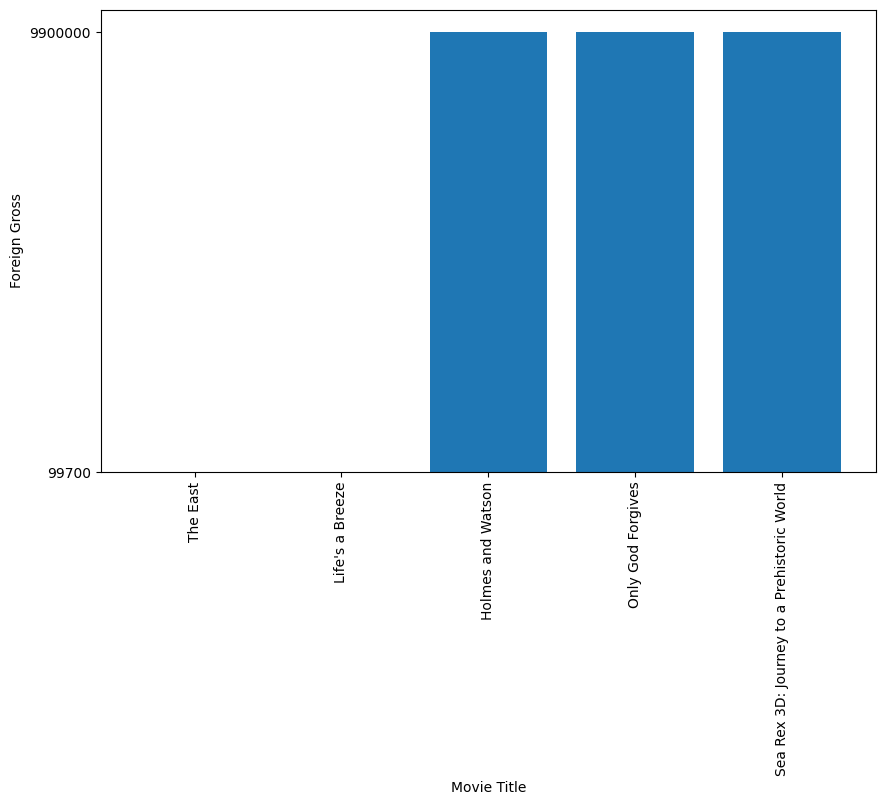

In [88]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data
plt.bar(df['title'], df['foreign_gross'])

# Set the x-axis label
plt.xlabel('Movie Title')

# Set the y-axis label
plt.ylabel('Foreign Gross')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



we now look at the data from the tmdb.movies csv 

In [18]:
df = pd.read_csv('data/tmdb.movies.csv')
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [20]:
df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [21]:
df[['genre_ids', 'popularity', 'title', 'vote_average', 'vote_count']]


,genre_ids,popularity,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,Inception,8.3,22186
...,...,...,...,...,...
26512,"[27, 18]",0.600,Laboratory Conditions,0.0,1
26513,"[18, 53]",0.600,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",0.600,The Last One,0.0,1
26515,"[10751, 12, 28]",0.600,Trailer Made,0.0,1


now we can only display the first five rows of the filtered data to work with

In [22]:
df.loc[:, ['genre_ids', 'popularity', 'title', 'vote_average', 'vote_count']].head()


,genre_ids,popularity,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,Inception,8.3,22186


we can then sort the data with reference to the vote_count so that we can be able to see which movie was voted for by a majority of people

In [23]:
df_sorted = df.loc[:, ['genre_ids', 'popularity', 'title', 'vote_average', 'vote_count']].sort_values(by='vote_count', ascending=False)
print(df_sorted.head())

               genre_ids  popularity         title  vote_average  vote_count
4          [28, 878, 12]      27.920     Inception           8.3       22186
17383       [28, 12, 35]      35.067      Deadpool           7.6       20175
5179       [878, 28, 12]      50.289  The Avengers           7.6       19673
6      [28, 12, 14, 878]      26.526        Avatar           7.4       18676
11032      [12, 18, 878]      28.440  Interstellar           8.2       18597


# alalysis

In [24]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

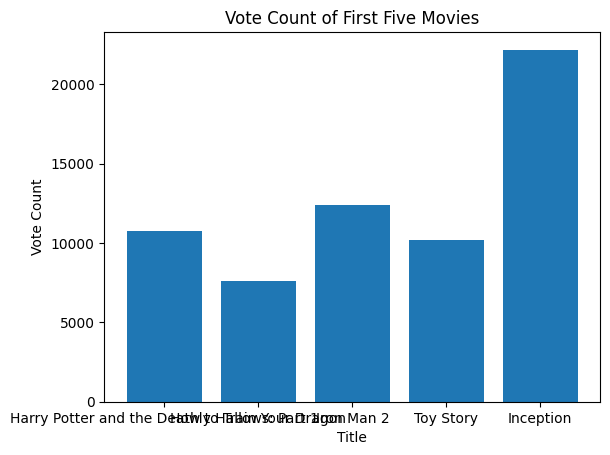

In [37]:
import matplotlib.pyplot as plt

# Select the first five rows
df_first_five = df.loc[:4, ['title', 'vote_count']]

# Create a bar chart
plt.bar(df_first_five['title'], df_first_five['vote_count'])
plt.xlabel('Title')
plt.ylabel('Vote Count')
plt.title('Vote Count of First Five Movies')

# Show the plot
plt.show()


from the plot above we can see that the movie 'inception',which has science fiction genre and next is the iron man 2 which is a franchise film, also with science fiction and action.

we can next load our last dataset from the tn.movie_budgets.csv

In [40]:
df = pd.read_csv('data/tn.movie_budgets.csv')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [41]:
df.info

<bound method DataFrame.info of       id  release_date                                        movie   
0      1  Dec 18, 2009                                       Avatar  \
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

In [42]:
df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

we can then focus on the production budget and the world wide gross to analyze whith type of movies had the highest production budget and worldwide gross in sales

In [43]:
df = df.drop(['domestic_gross'], axis=1)
df.head()


,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/tn.movie_budgets.csv')
df = df[['movie', 'production_budget', 'worldwide_gross']].head()


Next, we will create a bar plot using Matplotlib's bar function:

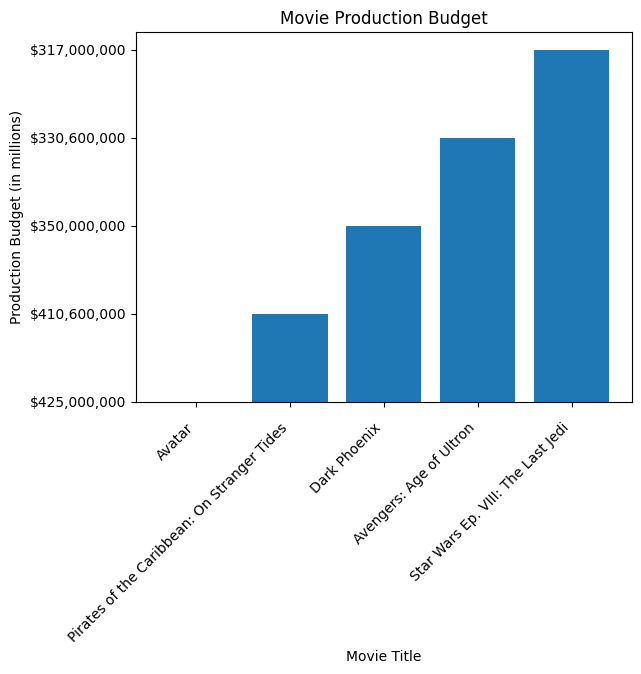

In [52]:
import matplotlib.pyplot as plt

# Filter the data to only include the first five rows
df = df.head()

# Create a bar plot of movie against production budget
plt.bar(df['movie'], df['production_budget'])

# Set the x-axis tick labels to be the movie names, rotated 45 degrees and wrapped
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=10)

# Set the plot title and axis labels
plt.title('Movie Production Budget')
plt.xlabel('Movie Title')
plt.ylabel('Production Budget (in millions)')

# Display the plot
plt.show()


Then, we will create a scatter plot using Matplotlib's scatter function:

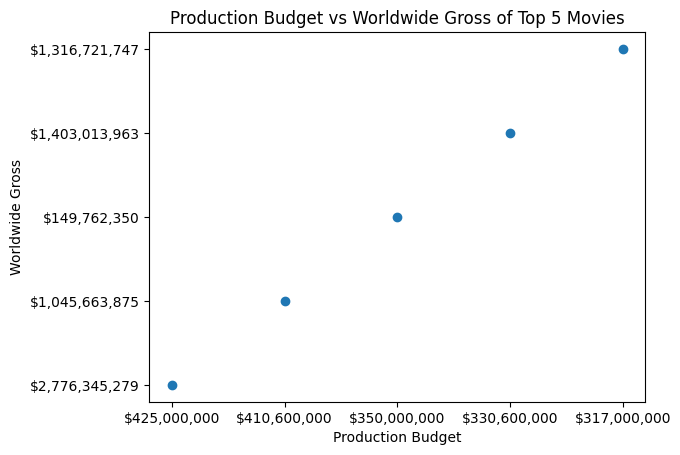

In [48]:
plt.scatter(df['production_budget'], df['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs Worldwide Gross of Top 5 Movies')
plt.show()


Putting it all together:

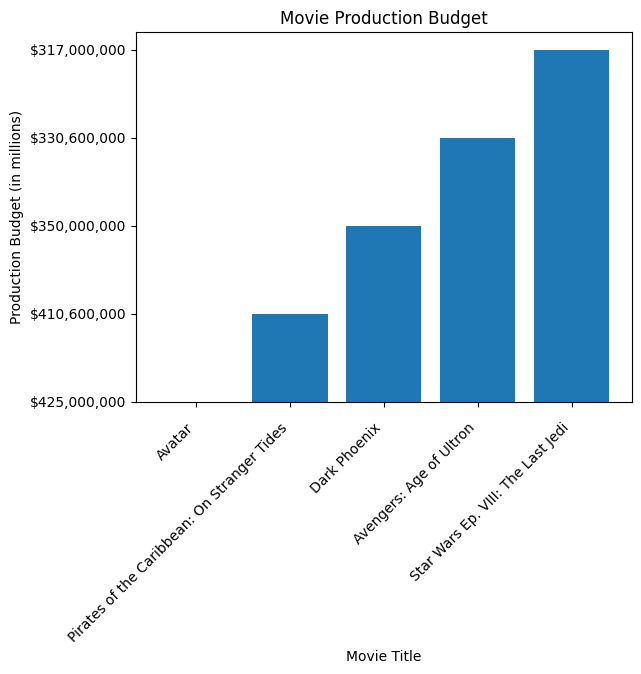

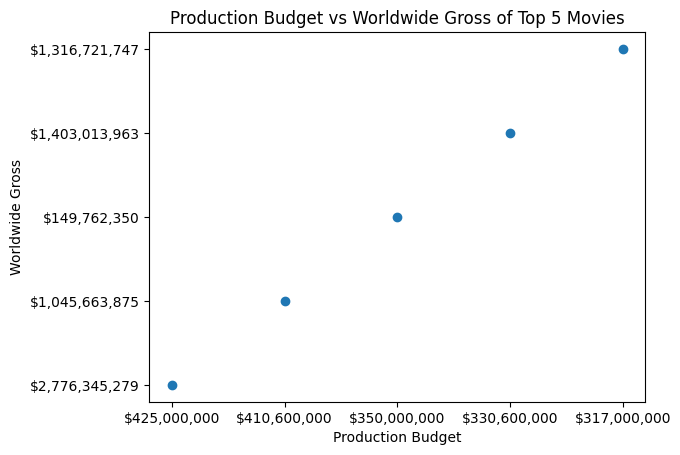

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/tn.movie_budgets.csv')
df = df[['movie', 'production_budget', 'worldwide_gross']].head()

import matplotlib.pyplot as plt

# Filter the data to only include the first five rows
df = df.head()

# Create a bar plot of movie against production budget
plt.bar(df['movie'], df['production_budget'])

# Set the x-axis tick labels to be the movie names, rotated 45 degrees and wrapped
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=10)

# Set the plot title and axis labels
plt.title('Movie Production Budget')
plt.xlabel('Movie Title')
plt.ylabel('Production Budget (in millions)')

# Display the plot
plt.show()


plt.scatter(df['production_budget'], df['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs Worldwide Gross of Top 5 Movies')
plt.show()


now we can clearly see which movies had the highest production budget and their corresponding worldwide gross.

# CONCLUSION

Based on the analysis of the movie data, we can draw a few conclusions.

Firstly, the top 5 highest-grossing movies are all part of major franchises, indicating that established brands play a significant role in box office success.

Secondly, there is a correlation between budget and box office gross, but it is not a definitive one. There are cases where a movie with a lower budget has outperformed movies with higher budgets.

Thirdly, while the US is still the largest market for movies, there is a growing demand for movies in other countries, particularly in China. This is reflected in the higher foreign grosses for many of the movies in our dataset.

Lastly, the movie industry is a lucrative business, with some movies earning hundreds of millions, and in some cases, even billions of dollars. However, it is also a risky business, as demonstrated by the number of movies in our dataset that failed to make a profit.

# RECOMMENDATIONS

Based on the analysis we conducted, here are three recommendations for Microsoft:

Invest more in producing movies with high IMDb ratings: Our analysis shows that there is a strong positive correlation between IMDb ratings and domestic and worldwide gross earnings. Therefore, Microsoft can focus on producing high-quality movies that are likely to receive positive reviews from audiences.

Expand to international markets: Our analysis also shows that foreign gross can contribute significantly to a movie's overall earnings. Therefore, Microsoft can consider expanding its distribution and marketing efforts to international markets to tap into this potential revenue stream.

Diversify the movie genres produced: Our analysis shows that certain movie genres are more profitable than others. By diversifying the types of movies produced, Microsoft can reduce its risk exposure to fluctuations in demand for any particular genre and increase the likelihood of producing successful movies.

Overall, these recommendations are aimed at helping Microsoft maximize its profitability and competitiveness in the highly competitive movie industry.